In [1]:
import pandas as pd

# Create an empty dictionary to store dataframes
dataframes = {}

# List of filenames (adjust as needed)
csv_files = ["2015_01.csv", "2015_02.csv", "2015_03.csv", "2015_04.csv", "2015_05.csv",
"2015_06.csv", "2015_07.csv", "2015_08.csv", "2015_09.csv", "2015_10.csv", "2015_11.csv",
"2015_12.csv"]

# Import each CSV file into a pandas dataframe
for csv_file in csv_files:
    # Extract the dataframe name from the filename (remove '.csv' extension)
    month = csv_file.split(".csv")[0].split("_")[1]
    
    # Read the CSV into a pandas dataframe and store it in the dictionary
    dataframes[month] = pd.read_csv(csv_file)
    del month

# Now 'dataframes' contains your dataframes as pandas dataframes
print(dataframes["02"])


       Unnamed: 0   lat   lon        time  avg_2m_temperature  \
0               1  25.0 -82.0  2015-02-01                 NaN   
1               2  25.0 -82.0  2015-02-02                 NaN   
2               3  25.0 -82.0  2015-02-03                 NaN   
3               4  25.0 -82.0  2015-02-04                 NaN   
4               5  25.0 -82.0  2015-02-05                 NaN   
...           ...   ...   ...         ...                 ...   
18223       18224  27.0 -79.0  2015-02-24                 NaN   
18224       18225  27.0 -79.0  2015-02-25                 NaN   
18225       18226  27.0 -79.0  2015-02-26                 NaN   
18226       18227  27.0 -79.0  2015-02-27                 NaN   
18227       18228  27.0 -79.0  2015-02-28                 NaN   

       max_2m_temperature  min_2m_temperature  prcp_total  \
0                    -inf                 inf        -inf   
1                    -inf                 inf        -inf   
2                    -inf           

In [2]:
import numpy as np

# dataframes = dictionary of dataframes
for key, df in dataframes.items():
    # Remove the unnamed column (index column)
    df = df.drop(df.columns[0], axis=1)  # The unnamed column is the first column
    
    # Replace Inf and -Inf with NaN
    df.replace([np.inf, -np.inf], np.nan, inplace=True)
    
    # Drop rows where all columns (after the first 3) are NaN
    df.dropna(subset=df.columns[3:], how="all", inplace=True)

    dataframes[key] = df

# Now 'dataframes' contains your dataframes as pandas dataframes
print(dataframes["02"])


        lat   lon        time  avg_2m_temperature  max_2m_temperature  \
1988   25.2 -81.1  2015-02-01           20.798552           22.765960   
1989   25.2 -81.1  2015-02-02           22.443188           23.879915   
1990   25.2 -81.1  2015-02-03           19.803352           23.341237   
1991   25.2 -81.1  2015-02-04           21.697579           23.866307   
1992   25.2 -81.1  2015-02-05           22.039884           22.584837   
...     ...   ...         ...                 ...                 ...   
17887  27.0 -80.2  2015-02-24           22.488899           27.611240   
17888  27.0 -80.2  2015-02-25           21.919174           27.022825   
17889  27.0 -80.2  2015-02-26           24.147728           28.278956   
17890  27.0 -80.2  2015-02-27           20.411104           22.739214   
17891  27.0 -80.2  2015-02-28           21.562910           22.669768   

       min_2m_temperature  prcp_total  avg_10m_u_component_of_wind  \
1988            19.584104    0.002475                

In [5]:
unique_lat_lon = {}  # Dictionary to store unique lat and lon values for each dataframe

# Iterate through the dataframes and store unique lat and lon values in the dictionary
for key, df in dataframes.items():
    unique_lat_lon[key] = (df['lat'].unique(), df['lon'].unique())

# Check if all dataframes have the same unique lat and lon values
first_key = list(unique_lat_lon.keys())[0]
same_unique_lat_lon = all(
    all(unique_lat_lon[first_key][0] == unique_lat_lon[key][0]) and
    all(unique_lat_lon[first_key][1] == unique_lat_lon[key][1])
    for key in unique_lat_lon
)

if same_unique_lat_lon:
    print("All dataframes have the same unique lat and lon values.")
else:
    print("Not all dataframes have the same unique lat and lon values.")


All dataframes have the same unique lat and lon values.


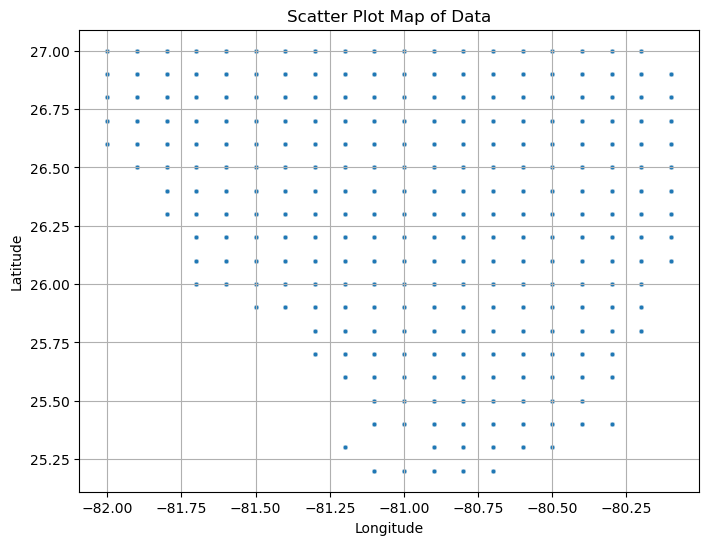

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a scatter plot
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
sns.scatterplot(x='lon', y='lat', data=dataframes['01'], marker='o', s=10)  # Customize marker and size as needed
plt.title(f"Scatter Plot Map of Data")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
    
# Save the plot to a file (optional)
plt.savefig(f"map_scatter_plot.png", dpi=300, bbox_inches='tight')
    
# Show the plot (optional)
plt.show()


C:\Users\yepesim\AppData\Local\Temp\ipykernel_28652\2749911419.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


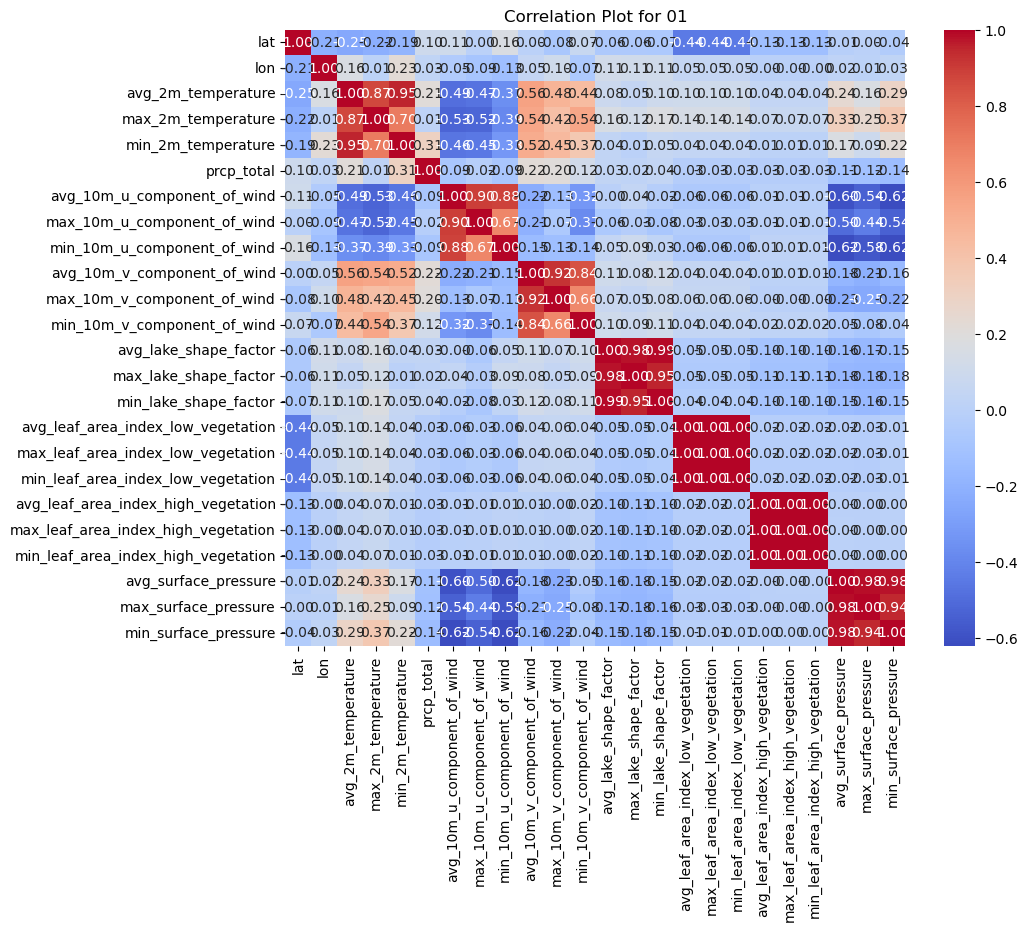

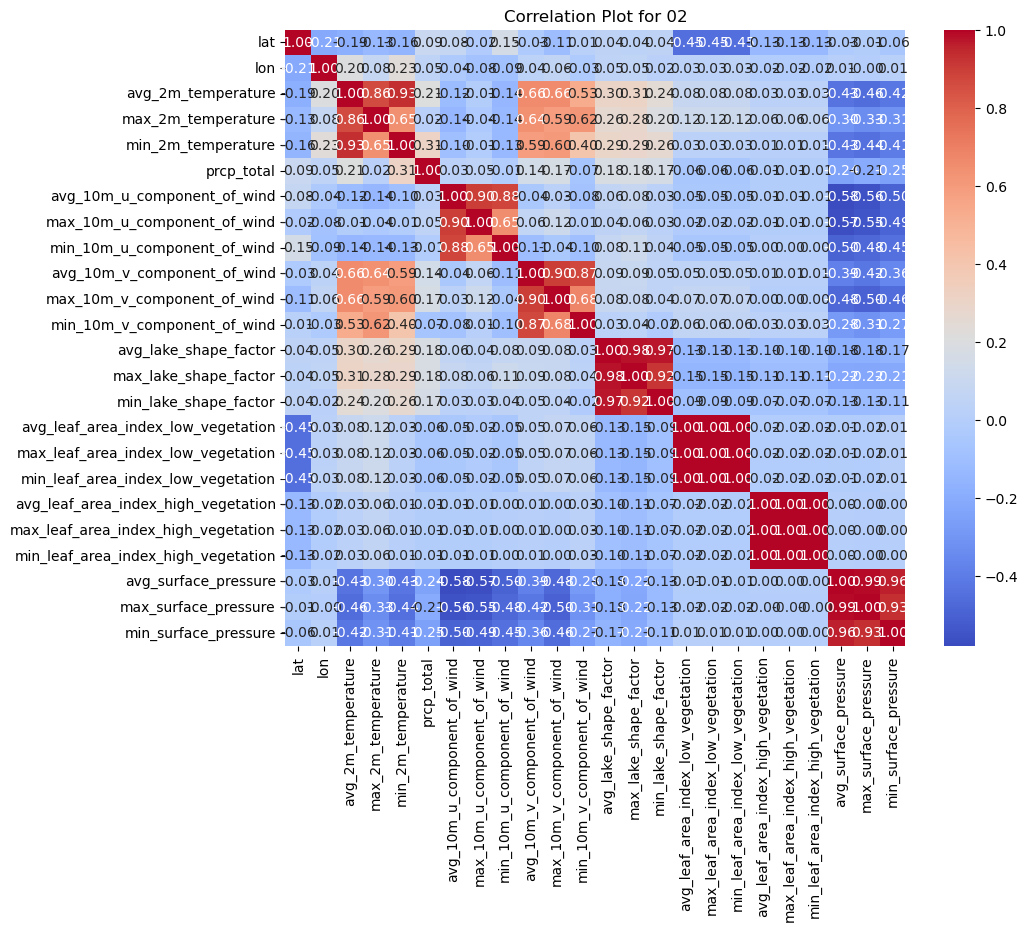

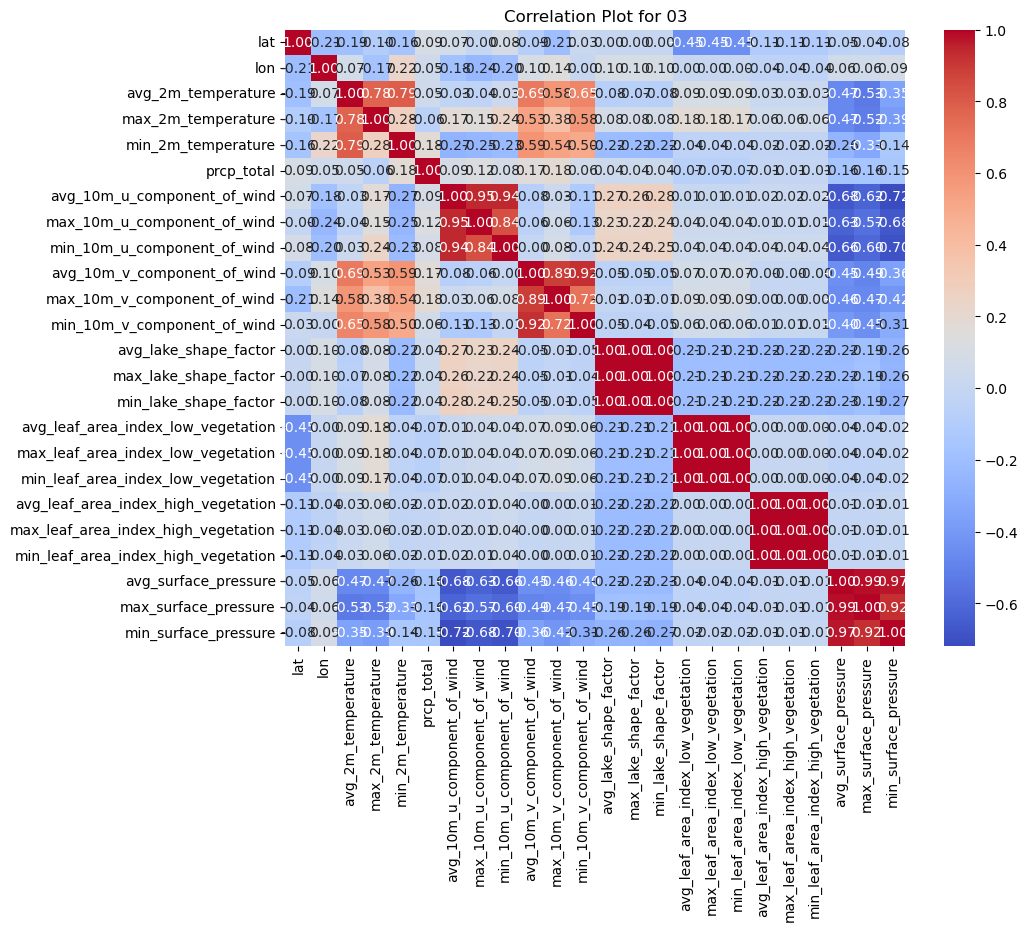

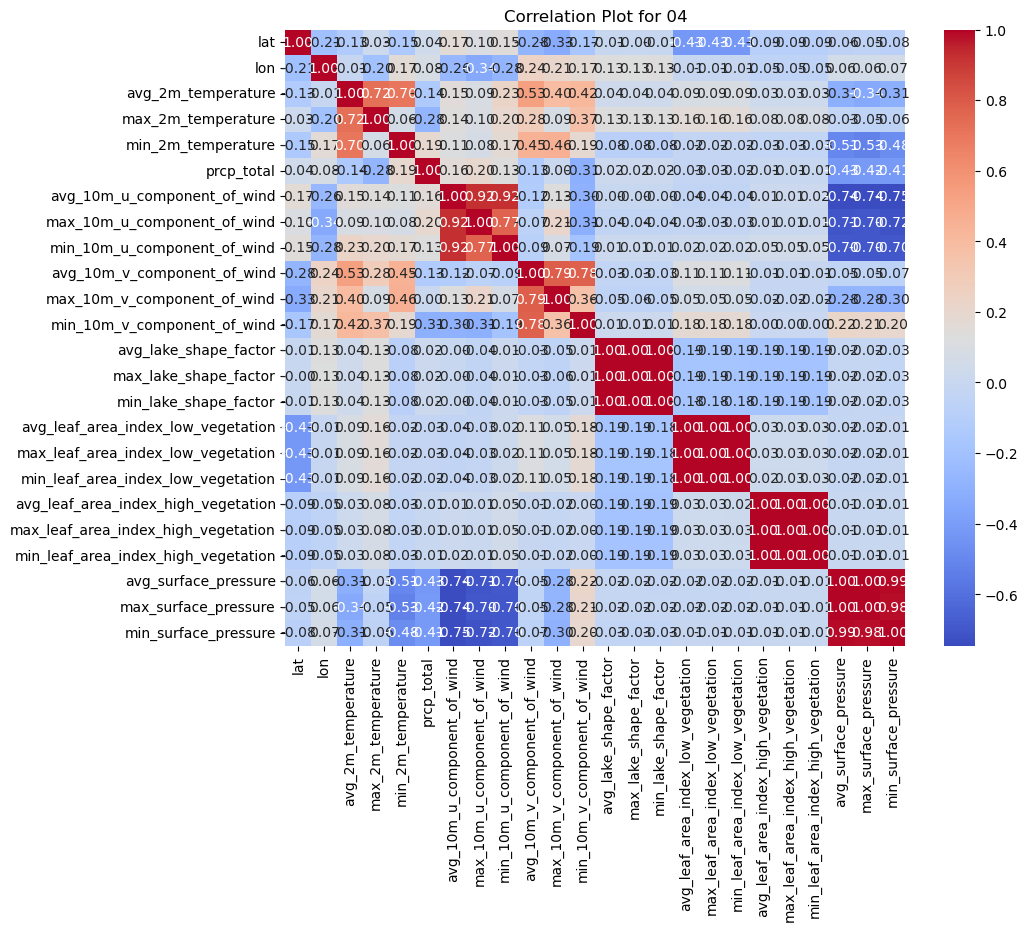

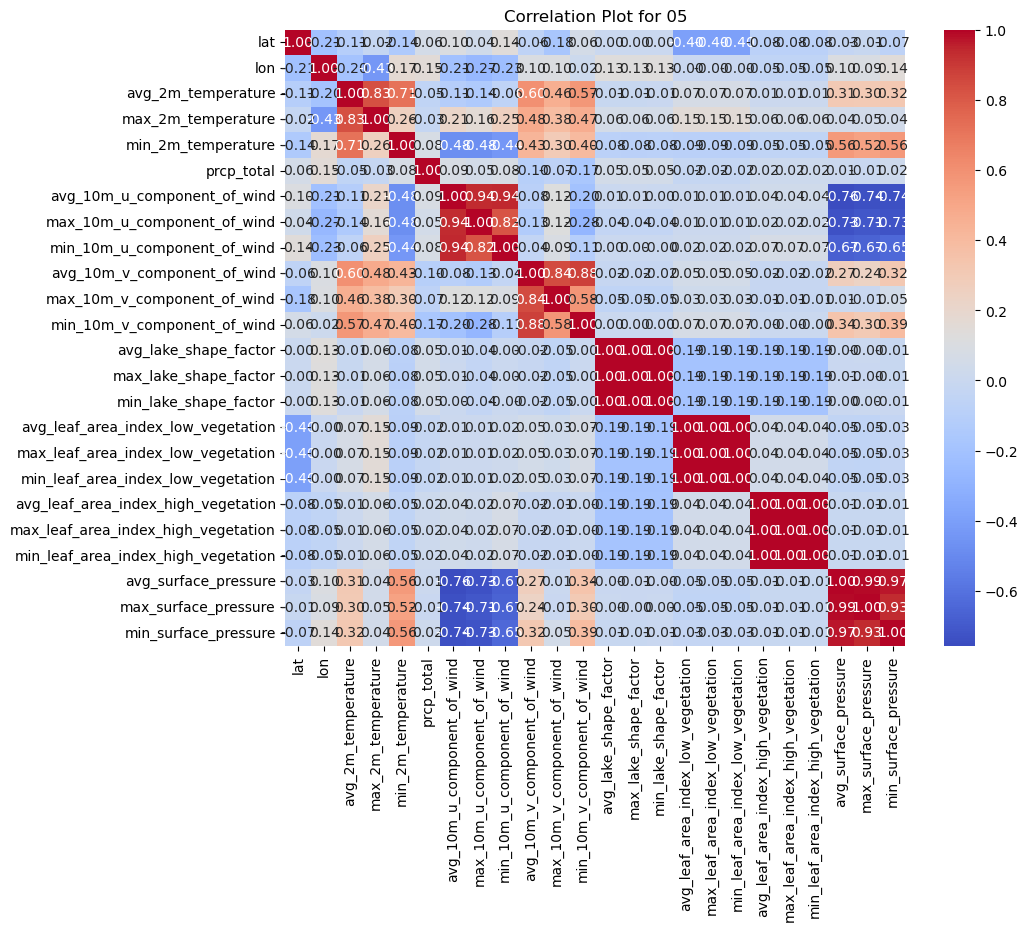

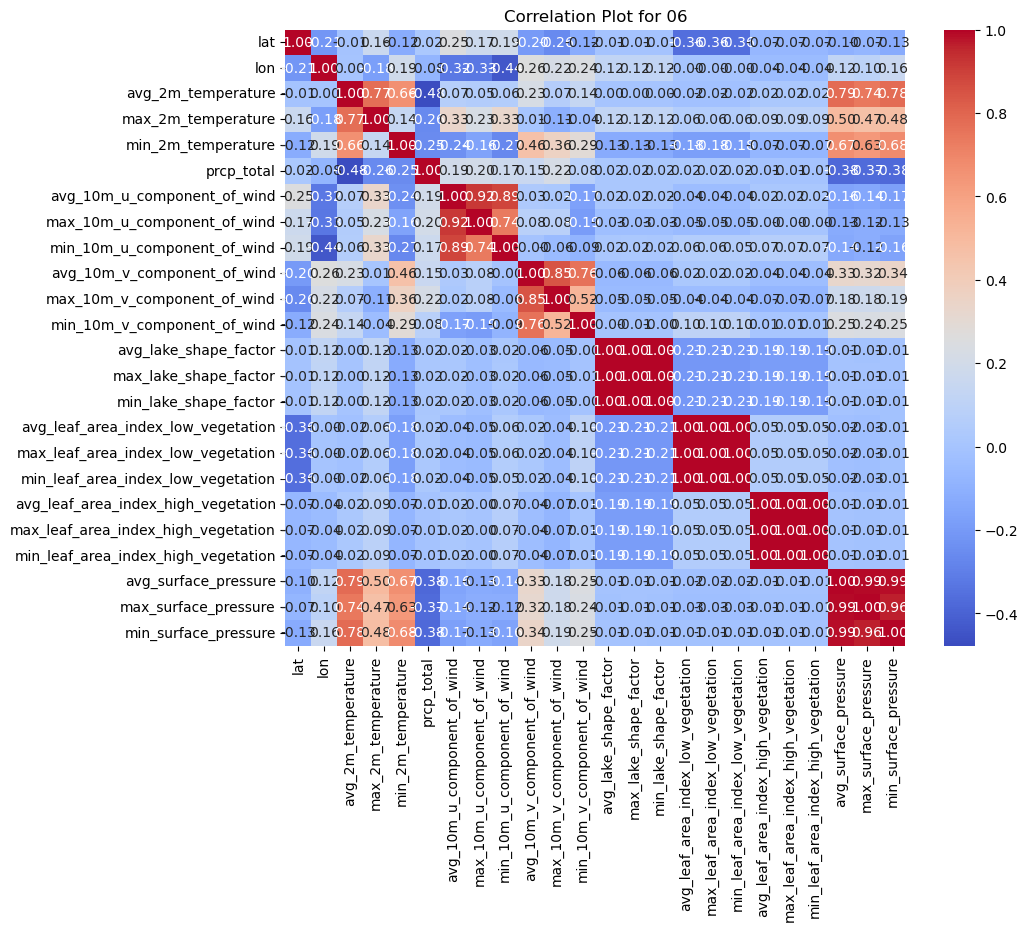

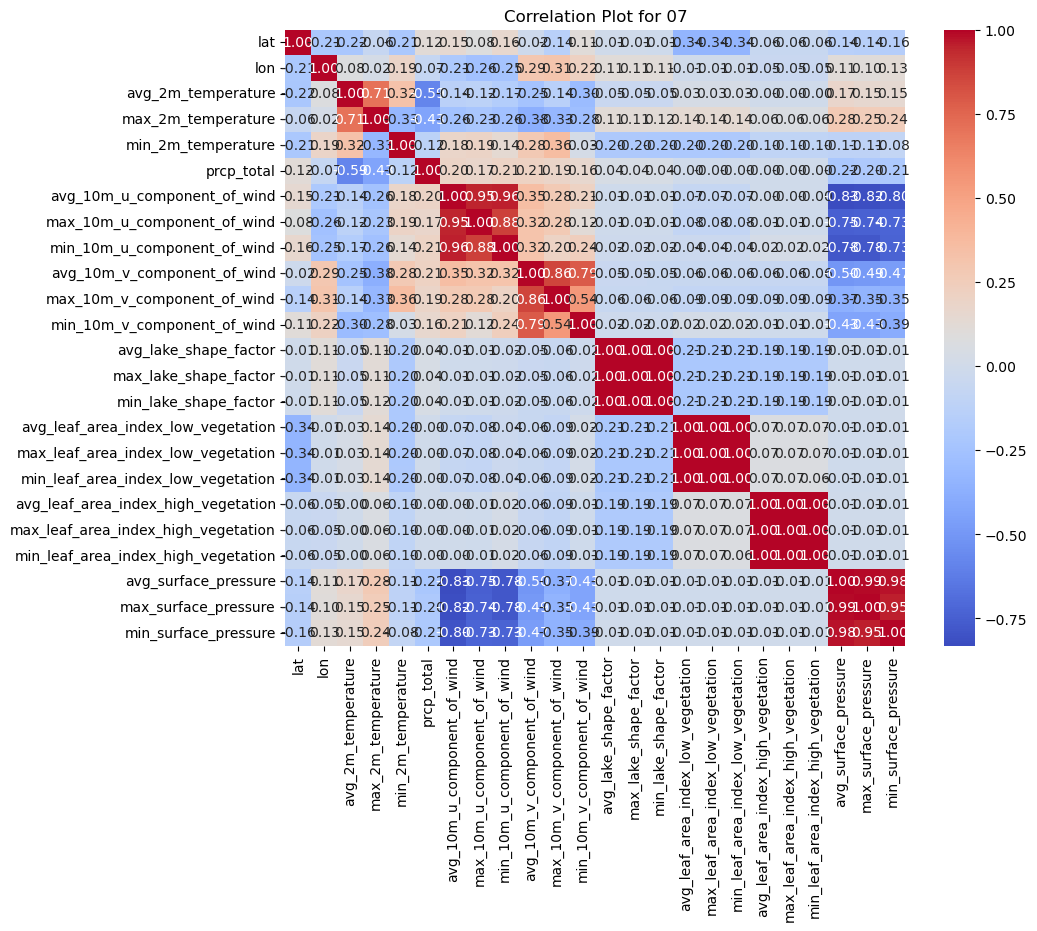

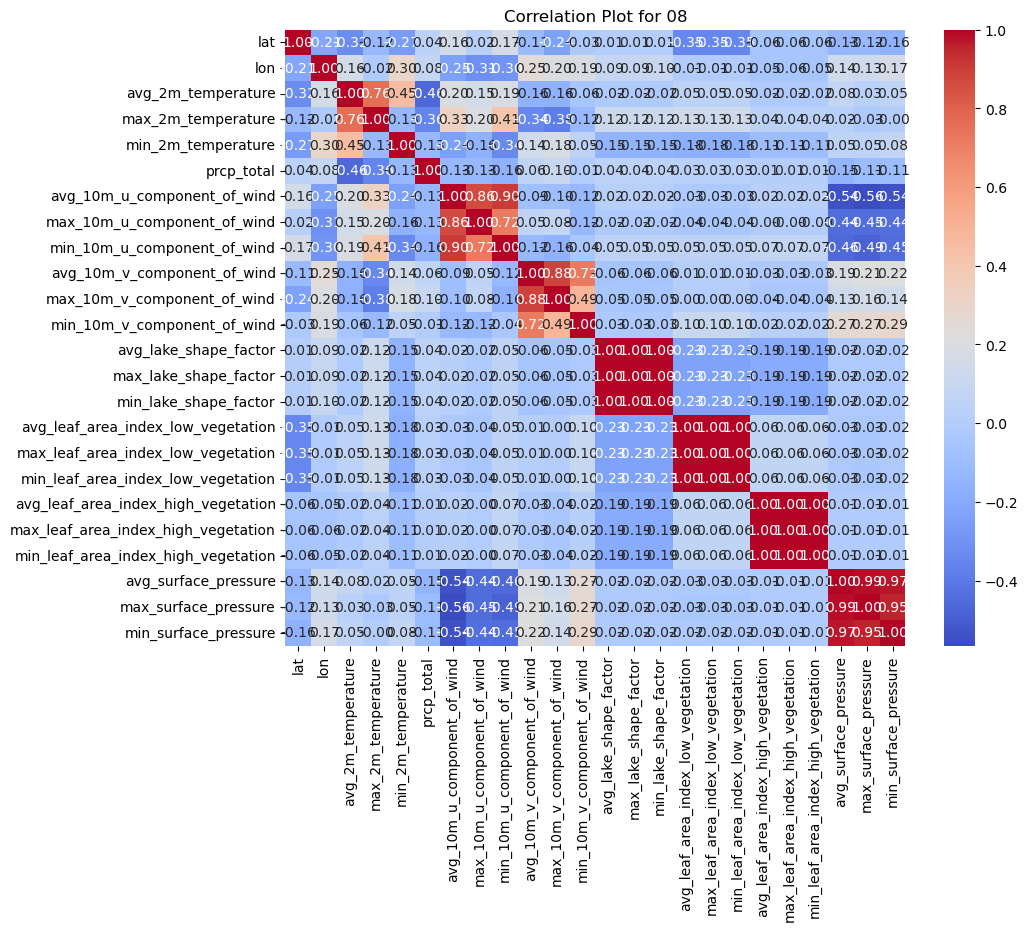

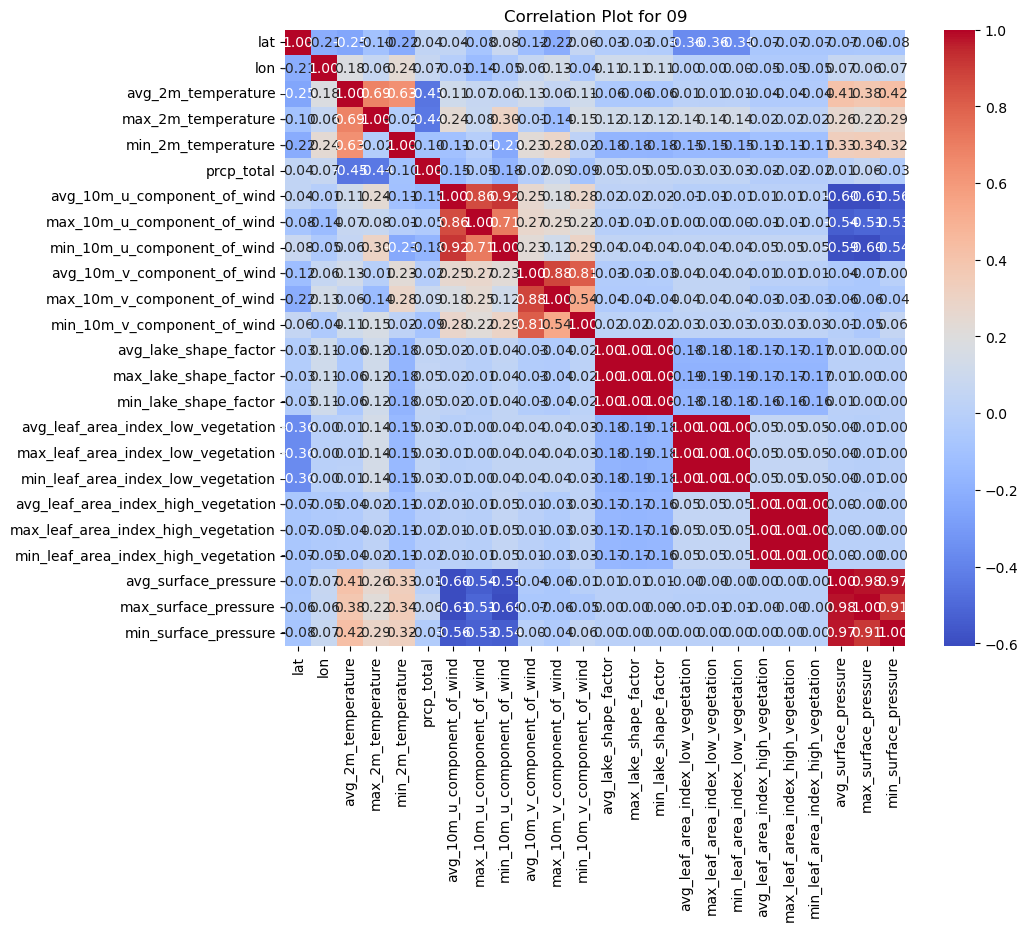

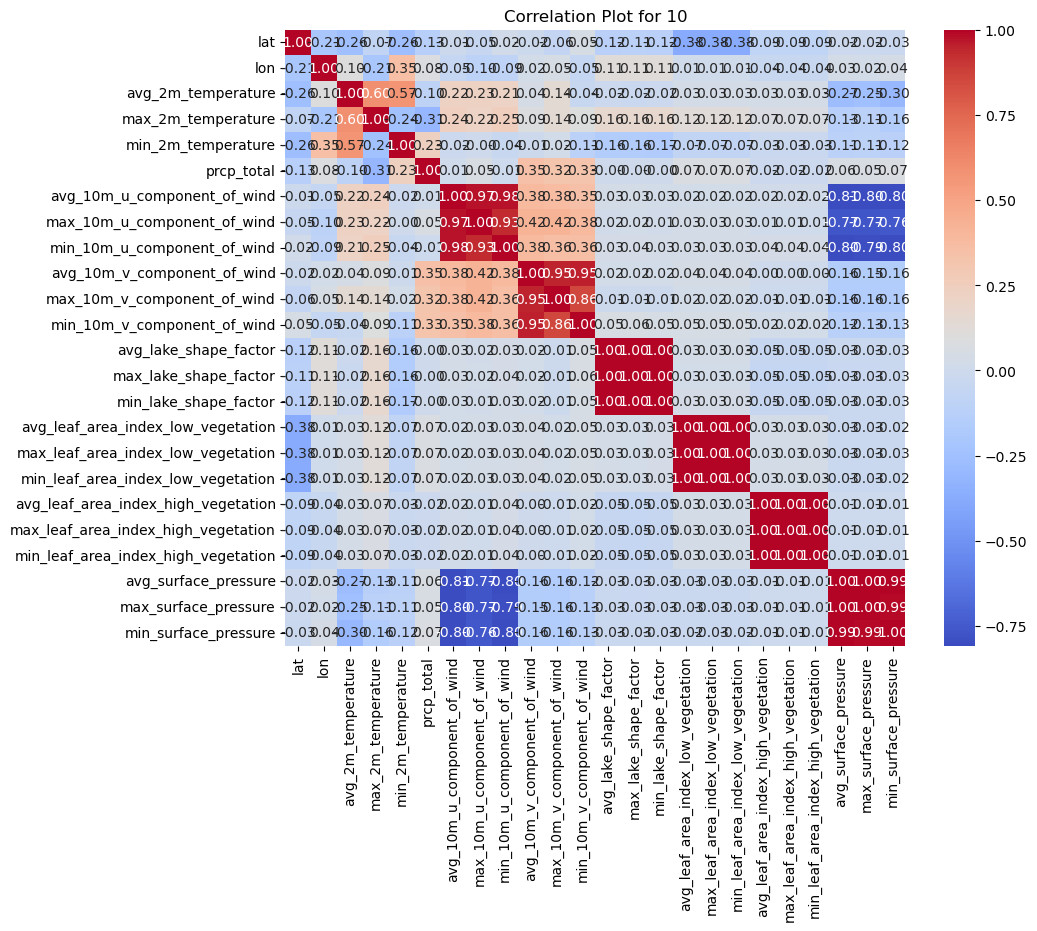

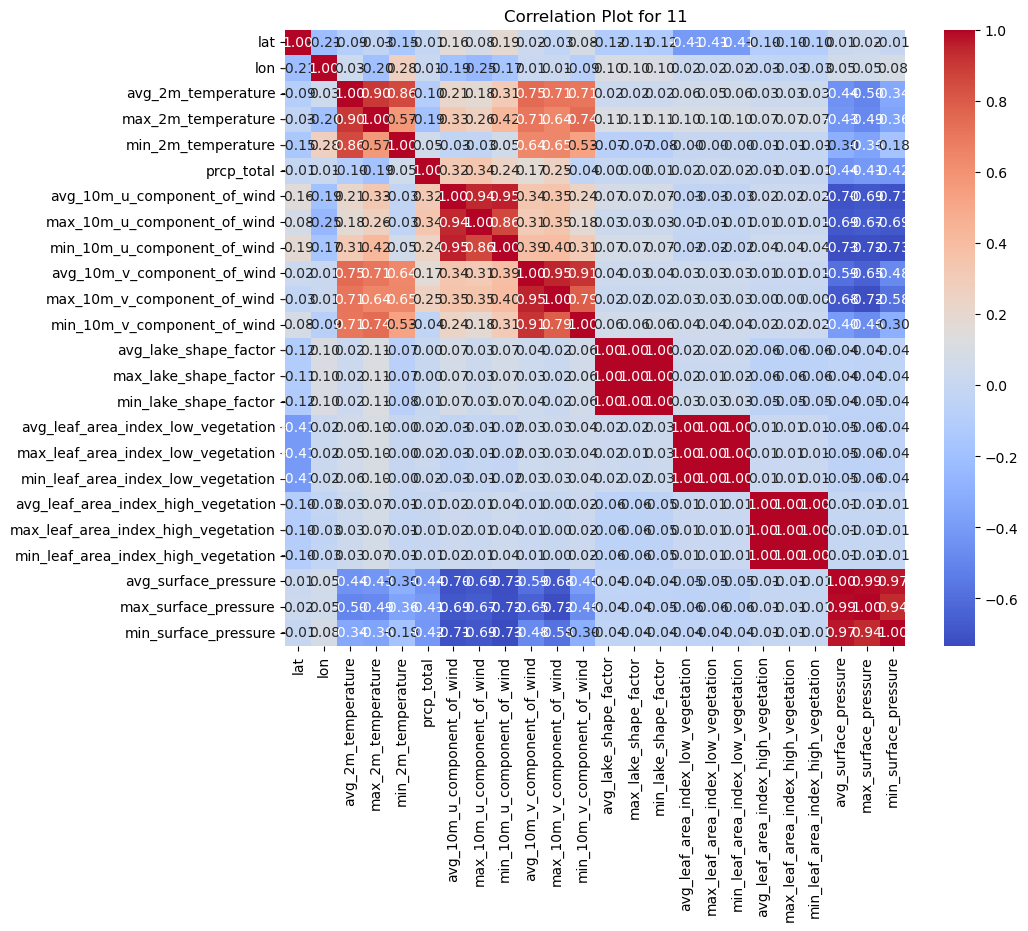

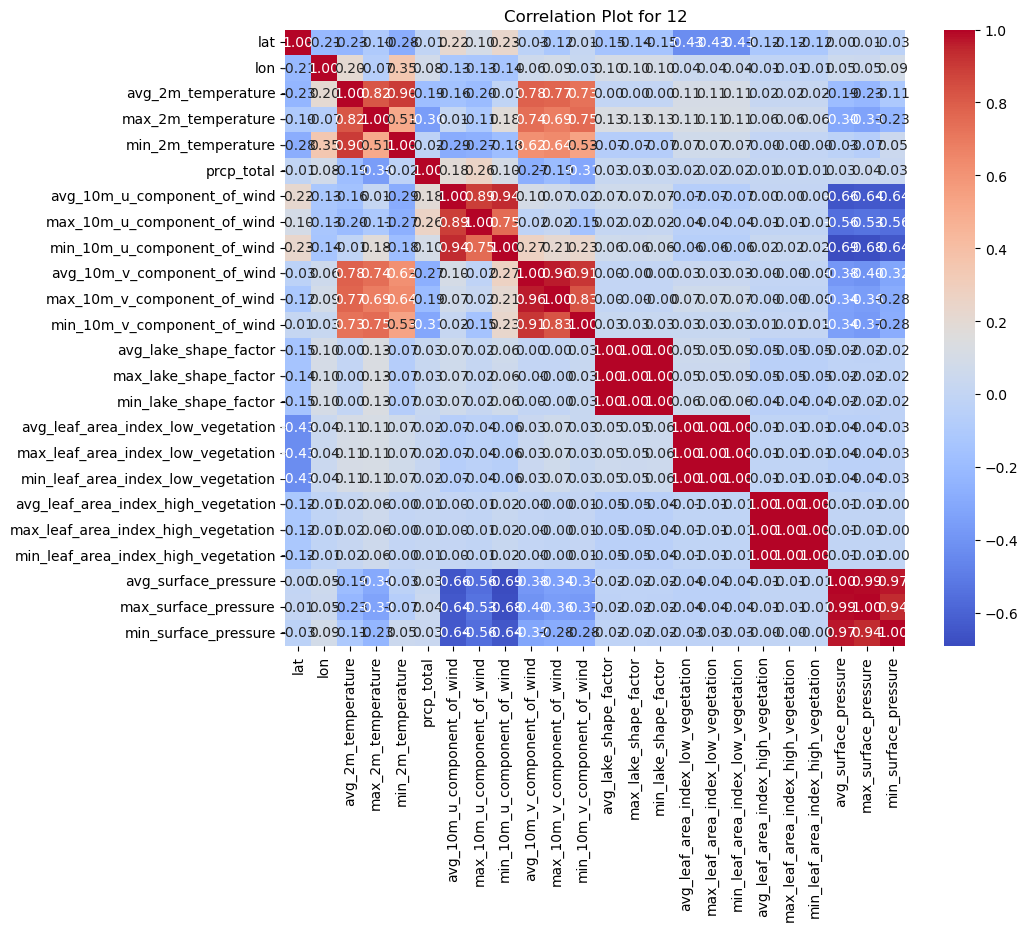

In [7]:
# Create a function to generate correlation plots for each dataframe
def generate_correlation_plot(df, title):
    # Compute the correlation matrix
    corr_matrix = df.corr()

    # Create a heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title(title)
    plt.show()

# Assuming 'my_dict' is your dictionary of dataframes
for key, df in dataframes.items():
    # Generate a correlation plot for each dataframe
    generate_correlation_plot(df, f"Correlation Plot for {key}")
